# eigengene methylation profile of module

The aim of this notebook is to compute the first PC of methylation module. 

Goals:
- load the updated data file that contain the community information
- compute the eigen profile (first PC) of the methylation module

In [1]:
suppressMessages({
    library(readr)
    library(ggplot2)
    library(dplyr)
    library(tidyr)
})

In [2]:
methylation <- read_csv('../../data/Figueroa/clusters/methyl-cluster-k30.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  Genes = col_character(),
  communities = col_integer()
)
See spec(...) for full column specifications.


In [3]:
head(methylation, n=2)

Genes,GSM464771,GSM464772,GSM464773,GSM464774,GSM464775,GSM464776,GSM464777,GSM464778,GSM464779,⋯,GSM465024,GSM465026,GSM465030,GSM465060,GSM465061,GSM465062,GSM465063,GSM465064,GSM465065,communities
LOC100133331,0.5656646,-0.2762509,0.5464723,1.390992,-1.250427,-0.7231627,-1.3639633,-0.6217651,-0.09007192,⋯,0.4027578,-0.64940248,-0.430032,0.2672083,2.583242,-0.0507937,-0.6815596,1.8492071,0.3190695,4
AK091100,0.8362348,0.9454242,1.0655506,-1.012361,-1.288259,-0.3199215,-0.3368407,-0.9481995,-0.63231572,⋯,0.3609546,0.09337669,-1.229339,-0.4294562,1.591340,-0.4957257,-1.2191908,0.7066319,0.1522136,4


## Compute the first principal component of each community

In [4]:
communities <- unique(methylation$communities)

In [5]:
table(methylation$communities)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
3467 2334 2327 2061 1660 1363 1331 1273  970  941  888  855  754  695  506  500 
  16   17   18   19 
 377  337   65   55 

In [6]:
# are we interested in communities that is large enoguh?
0.05 * dim(methylation)[1]

[1] 1137.95

In [7]:
methylation.community19 = methylation %>%
  filter(communities == 19) %>%
  select(-c(communities))
res.pr = prcomp(t(methylation.community19[,-1])) 


In [8]:
plot.data = data.frame(t(methylation.community19[,-1]))
colnames(plot.data) = unlist(methylation.community19[,1])
plot.data$patient = rownames(plot.data)

In [9]:
head(plot.data)

,MOSPD2,SH3KBP1,MAOA,RBM10,ZNF41,SPACA5B,FTSJ1,OTUD5,GRIPAP1,TFE3,⋯,NLGN4Y,NLGN4Y.1,TTTY14,TTTY14.1,BCORL2,CYorf15A,CYorf15A.1,EIF1AY,EIF1AY.1,patient
GSM464771,0.99967952,0.6545216,0.6778718,1.0492785,0.9161345,0.9148044,-1.1613856,0.73477747,1.1118043,1.36726742,⋯,1.6177295,1.3952804,1.214803335,1.3326624,-0.2830377,1.1295850,1.18419654,-0.6851996,0.7901102,GSM464771
GSM464772,-0.81668871,-0.7649117,-0.9283344,-0.9231548,-0.2961715,-0.9903180,0.5099779,-1.74235863,-0.5677325,-0.86095679,⋯,-0.5751920,-0.2678403,-0.001498708,0.1345493,0.4422222,0.1450672,0.03878761,0.3563973,0.2544000,GSM464772
GSM464773,-1.67064563,-0.4567672,-0.9927816,-0.7595523,-0.6852025,-1.2206149,0.2944597,-0.33574176,-0.7027877,-1.73225258,⋯,-0.5624078,-0.4750724,-0.693754421,-0.6822119,-0.2726342,-0.7533322,-0.68196339,-0.6403348,-0.8113461,GSM464773
GSM464774,0.70447078,0.2926076,0.3269183,1.3055420,1.2781385,0.4314105,-0.4966743,0.40853426,0.6174985,0.71385469,⋯,1.4398832,0.4556594,1.441519139,1.5791864,2.2728790,1.5645480,1.40541044,0.6115055,1.4071454,GSM464774
GSM464775,0.73804903,0.3790093,0.5929211,0.7842013,1.2285515,0.4841641,0.6903818,-0.43251086,1.0568875,0.13755565,⋯,-0.8821250,-0.3787336,-0.062040586,0.1548468,0.4729455,0.1659059,0.25810151,0.3707073,0.7401014,GSM464775
GSM464776,-0.05178007,-1.1301273,-0.6082638,0.6911290,0.1243563,-0.3242727,0.8061868,-0.01377596,-0.3820536,0.04697827,⋯,1.1983522,0.2270498,0.816019697,1.0912501,-1.5062377,0.9224037,0.76710037,-0.3466624,0.6426864,GSM464776


In [16]:
PC1 = data.frame(patient=rownames(plot.data), PC1=res.pr$x[,1]) # it looks like PC is in different scale compared with the original values

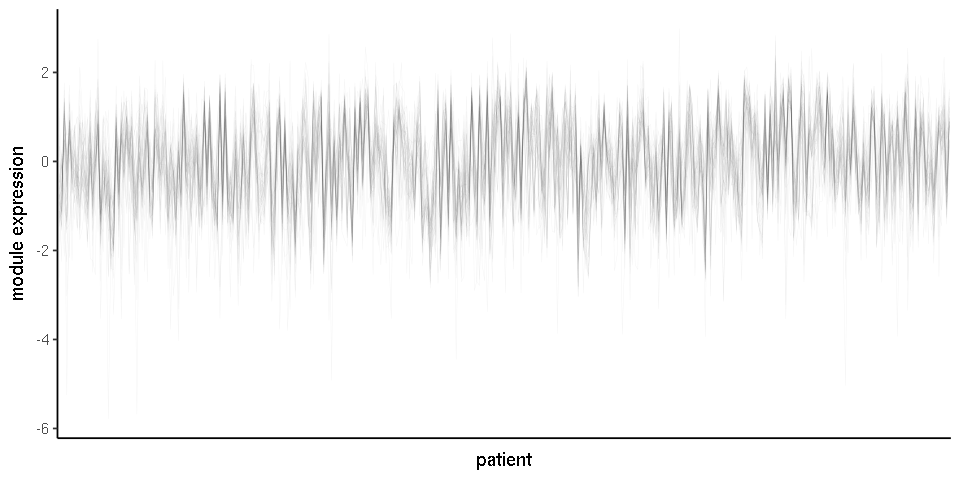

In [21]:
options(repr.plot.width=8, repr.plot.height=4)
plot.data %>%
  gather(probe, level, -patient) %>%
  ggplot(data=.) + 
    geom_line(aes(x=patient, y=level, group=probe), alpha=0.05, size=0.1) + 
    theme_classic() + theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) +
   xlab('patient') + ylab('module expression') 